In [1]:
%load_ext watermark


In [2]:
from IPython.display import display
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp


In [3]:
%watermark -diwmuv -iv


Last updated: 2024-11-07T17:55:34.707936+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.5.0-1025-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.1.3
seaborn: 0.13.2
pandas : 2.2.3

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2024-11-05-openai-repr-size-4o"
teeplot_subdir


'2024-11-05-openai-repr-size-4o'

## Prep Data


In [5]:
df = pd.read_csv("https://osf.io/b9h4z/download")
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,replicate,num_taxa
count,1330.000000,1286.000000,1330.000000,1286.000000,1330.000000,1330.000000
mean,0.595489,0.458009,0.812030,0.839813,9.000000,10.714286
std,0.711283,0.671390,0.390835,0.366922,5.479286,7.594473
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.000000,0.000000,1.000000,1.000000,4.000000,4.000000
50%,0.000000,0.000000,1.000000,1.000000,9.000000,8.000000
75%,1.000000,1.000000,1.000000,1.000000,14.000000,18.000000
max,2.000000,2.000000,1.000000,1.000000,18.000000,25.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,model
0,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",0,0.0,1.0,1.0,2024-11-06T09:06:40.712043,0,question_equivalence_identical,3,newick,gpt-4o
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",0,0.0,1.0,1.0,2024-11-06T09:06:41.121359,0,question_equivalence_identical,3,json,gpt-4o
2,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",0,0.0,1.0,1.0,2024-11-06T09:06:41.735695,0,question_equivalence_rotate_tree,3,newick,gpt-4o
3,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",0,0.0,1.0,1.0,2024-11-06T09:06:42.248484,0,question_equivalence_rotate_tree,3,json,gpt-4o
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","1: no, the phylogenies are different",1,1.0,1.0,1.0,2024-11-06T09:06:42.759584,0,question_equivalence_swap_taxa,3,newick,gpt-4o


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,model
1325,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",1,0.0,0.0,0.0,2024-11-06T09:32:02.486272,18,question_equivalence_swap_taxa,25,json,gpt-4o
1326,Consider the following phylogenetic tree:\n\n ...,T16 and T05|T16 and T10|T05 and T10,"To determine which pair among T16, T05, and T1...",1,1.0,1.0,1.0,2024-11-06T09:32:06.379695,18,question_identify_most_related,25,newick,gpt-4o
1327,Consider the following phylogenetic tree:\n\n ...,T16 and T05|T16 and T10|T05 and T10,1: T16 and T10,1,1.0,1.0,1.0,2024-11-06T09:32:06.991605,18,question_identify_most_related,25,json,gpt-4o
1328,Consider the following phylogenetic tree:\n\n ...,T05|T21|neither,2: neither,0,2.0,0.0,0.0,2024-11-06T09:32:08.016425,18,question_most_related_to_x,25,newick,gpt-4o
1329,Consider the following phylogenetic tree:\n\n ...,T05|T21|neither,0: T05,0,0.0,1.0,1.0,2024-11-06T09:32:08.631400,18,question_most_related_to_x,25,json,gpt-4o


In [6]:
df["Q"] = df["question"].str.slice(9)


In [7]:
df["num choices"] = df["choices"].str.count(r"\|") + 1


In [8]:
df["adj score"] = df["score"] * df["num choices"]


In [9]:
display(df.describe()), display(df.head()), display(df.tail());


,true answer,llm answer,score,score - invalid as nan,replicate,num_taxa,num choices,adj score
count,1330.000000,1286.000000,1330.000000,1286.000000,1330.000000,1330.000000,1330.000000,1330.000000
mean,0.595489,0.458009,0.812030,0.839813,9.000000,10.714286,2.400000,1.942105
std,0.711283,0.671390,0.390835,0.366922,5.479286,7.594473,0.490082,1.033139
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,4.000000,4.000000,2.000000,2.000000
50%,0.000000,0.000000,1.000000,1.000000,9.000000,8.000000,2.000000,2.000000
75%,1.000000,1.000000,1.000000,1.000000,14.000000,18.000000,3.000000,3.000000
max,2.000000,2.000000,1.000000,1.000000,18.000000,25.000000,3.000000,3.000000


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,model,Q,num choices,adj score
0,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",0,0.0,1.0,1.0,2024-11-06T09:06:40.712043,0,question_equivalence_identical,3,newick,gpt-4o,equivalence_identical,2,2.0
1,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",0,0.0,1.0,1.0,2024-11-06T09:06:41.121359,0,question_equivalence_identical,3,json,gpt-4o,equivalence_identical,2,2.0
2,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",0,0.0,1.0,1.0,2024-11-06T09:06:41.735695,0,question_equivalence_rotate_tree,3,newick,gpt-4o,equivalence_rotate_tree,2,2.0
3,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",0,0.0,1.0,1.0,2024-11-06T09:06:42.248484,0,question_equivalence_rotate_tree,3,json,gpt-4o,equivalence_rotate_tree,2,2.0
4,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","1: no, the phylogenies are different",1,1.0,1.0,1.0,2024-11-06T09:06:42.759584,0,question_equivalence_swap_taxa,3,newick,gpt-4o,equivalence_swap_taxa,2,2.0


,prompt,choices,response,true answer,llm answer,score,score - invalid as nan,timestamp,replicate,question,num_taxa,tree representation,model,Q,num choices,adj score
1325,Consider the following phylogenetic trees:\n\n...,"yes, the phylogenies are equivalent|no, the ph...","0: yes, the phylogenies are equivalent",1,0.0,0.0,0.0,2024-11-06T09:32:02.486272,18,question_equivalence_swap_taxa,25,json,gpt-4o,equivalence_swap_taxa,2,0.0
1326,Consider the following phylogenetic tree:\n\n ...,T16 and T05|T16 and T10|T05 and T10,"To determine which pair among T16, T05, and T1...",1,1.0,1.0,1.0,2024-11-06T09:32:06.379695,18,question_identify_most_related,25,newick,gpt-4o,identify_most_related,3,3.0
1327,Consider the following phylogenetic tree:\n\n ...,T16 and T05|T16 and T10|T05 and T10,1: T16 and T10,1,1.0,1.0,1.0,2024-11-06T09:32:06.991605,18,question_identify_most_related,25,json,gpt-4o,identify_most_related,3,3.0
1328,Consider the following phylogenetic tree:\n\n ...,T05|T21|neither,2: neither,0,2.0,0.0,0.0,2024-11-06T09:32:08.016425,18,question_most_related_to_x,25,newick,gpt-4o,most_related_to_x,3,0.0
1329,Consider the following phylogenetic tree:\n\n ...,T05|T21|neither,0: T05,0,0.0,1.0,1.0,2024-11-06T09:32:08.631400,18,question_most_related_to_x,25,json,gpt-4o,most_related_to_x,3,3.0


## Example Plot


teeplots/2024-11-05-openai-repr-size-4o/col=q+hue=tree-representation+kind=line+palette=muted+viz=relplot+x=num-taxa+y=score+ext=.pdf
teeplots/2024-11-05-openai-repr-size-4o/col=q+hue=tree-representation+kind=line+palette=muted+viz=relplot+x=num-taxa+y=score+ext=.png


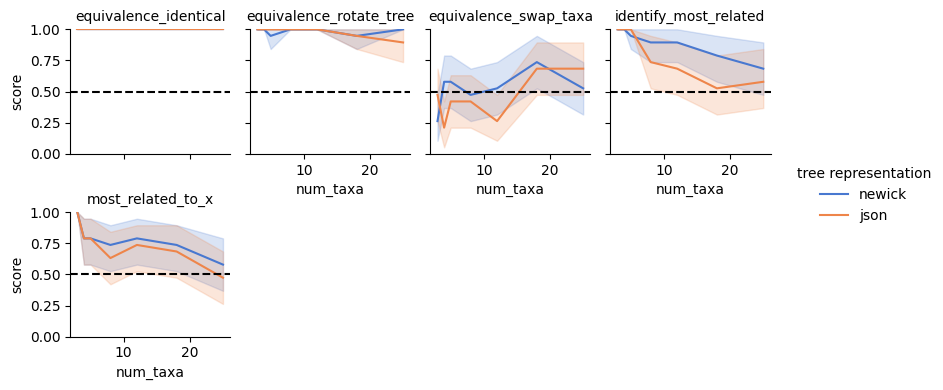

In [10]:
saveit, teed = tp.tee(
    sns.relplot,
    data=df,
    x="num_taxa",
    y="score",
    hue="tree representation",
    col="Q",
    col_wrap=4,
    height=2,
    kind="line",
    palette="muted",
    teeplot_callback=True,
    teeplot_subdir=teeplot_subdir,
)

teed.set(ylim=(0, 1.0))
teed.refline(y=0.5, linestyle="--", color="black")
teed.set_titles(col_template="{col_name}")

saveit()


teeplots/2024-11-05-openai-repr-size-4o/col=q+hue=tree-representation+kind=line+palette=muted+viz=relplot+x=num-taxa+y=adj-score+ext=.pdf
teeplots/2024-11-05-openai-repr-size-4o/col=q+hue=tree-representation+kind=line+palette=muted+viz=relplot+x=num-taxa+y=adj-score+ext=.png


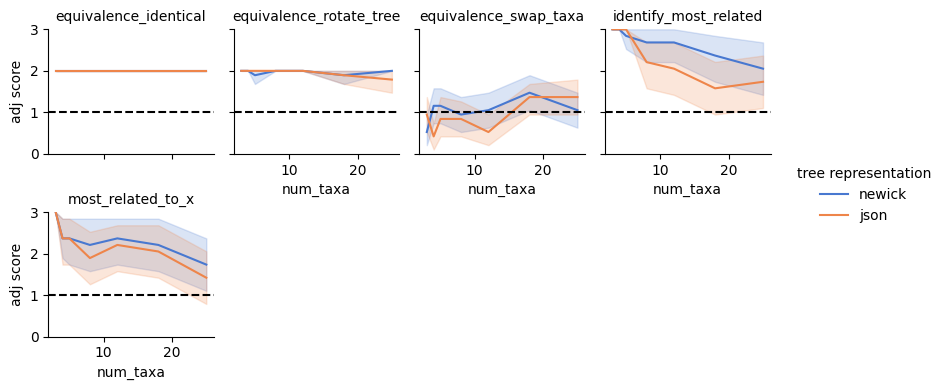

In [11]:
saveit, teed = tp.tee(
    sns.relplot,
    data=df,
    x="num_taxa",
    y="adj score",
    hue="tree representation",
    col="Q",
    col_wrap=4,
    height=2,
    kind="line",
    palette="muted",
    teeplot_callback=True,
    teeplot_subdir=teeplot_subdir,
)

teed.set(ylim=(0, df["num choices"].max()))
teed.refline(y=1.0, linestyle="--", color="black")
teed.set_titles(col_template="{col_name}")

saveit()
